## Package Installation

In [1]:
!apt-get update
!apt-get install swig -y

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://cli.github.com/packages stable InRelease [3,917 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [69.2 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,598 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,966 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [6,411 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-back

In [2]:
!pip install sparklen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sparklen: filename=sparklen-1.0.0-cp312-cp312-linux_x86_64.whl size=937910 sha256=3e12e151531bc388c1bb31f32949f13f6c8c92da190dbbbd698daf44ff8c2301
  Stored in directory: /root/.cache/pip/wheels/bc/a6/69/de616a46fb6e3de19118ba8090015b77c74ccf749d01a97753
Successfully built sparklen


## Mount to Google Drive

In [3]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Base directory (your Drive location)
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/MilestoneFall2025'
DATASET_DIR = os.path.join(BASE_DIR, 'Datasets')
CHECKPOINT_DIR = os.path.join(BASE_DIR, 'checkpoints')
RESULTS_DIR = os.path.join(BASE_DIR, 'results')

# Create results directory if it doesn't exist
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"✓ Base Directory: {BASE_DIR}")
print(f"✓ Dataset Directory: {DATASET_DIR}")
print(f"✓ Checkpoint Directory: {CHECKPOINT_DIR}")
print(f"✓ Results Directory: {RESULTS_DIR}")

Mounted at /content/drive
✓ Base Directory: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025
✓ Dataset Directory: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/Datasets
✓ Checkpoint Directory: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/checkpoints
✓ Results Directory: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/results


## Creating the Hawkes Process

### Hyper Parameter Setup

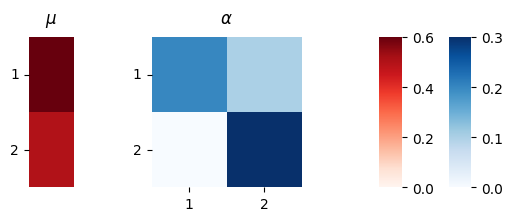

In [4]:
"""
===============================================================================
Simulation of a Multivariate Hawkes Process (MHP)
===============================================================================

The following provides a comprehensive guide to using
:class:`~sparklen.hawkes.simulation.SimuHawkesExp` to simulate the
events of a MHP.
"""

# Author: Romain E. Lacoste
# License: BSD-3-Clause

# Setup environment -----------------------------------------------------------

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sparklen.hawkes.simulation import SimuHawkesExp
from sparklen.plot import plot_values

# Set the true coefficients ---------------------------------------------------

d = 2
beta = 3.0

mu_regime_1 = np.array([0.6, 0.5])
alpha_regime_1 = np.array([[0.2, 0.1], [0.0, 0.3]])

mu_regime_2 = np.array([0.9, 0.2])
alpha_regime_2 = np.array([[0.35, 0.25], [0.15, 0.1]])

mu_regime_3 = np.array([0.2, 0.8])
alpha_regime_3 = np.array([[0.1, 0.05], [0.30, 0.45]])

theta_star_regime_1 = np.hstack([np.reshape(mu_regime_1, (d,-1)), alpha_regime_1])

theta_star_regime_2 = np.hstack([np.reshape(mu_regime_2, (d,-1)), alpha_regime_2])

theta_star_regime_3 = np.hstack([np.reshape(mu_regime_3, (d,-1)), alpha_regime_3])

# Plot the true coefficients --------------------------------------------------

plot_values(theta_star_regime_1)

# Simulate data ---------------------------------------------------------------

T = 20
n = 500

### Hawkes Regime 1

In [5]:
hawkes_regime_1 = SimuHawkesExp(
    mu=mu_regime_1, alpha=alpha_regime_1, beta=beta,
    end_time=T, n_samples=n,
    random_state=8)

hawkes_regime_1.simulate()

data_regime_1 = hawkes_regime_1.timestamps
print(data_regime_1)

[[array([ 2.13907193,  3.69463114,  3.87729098,  4.49856617,  4.8270429 ,
        5.14290497,  7.45497806,  7.82169613,  8.75763746,  9.57930908,
       17.39793023]), array([ 0.33564105,  3.00412224,  3.63107875,  5.1184101 ,  5.33837298,
        5.69241275,  7.42774257,  7.8662142 ,  7.89337163, 11.81805704,
       12.0396002 , 12.08544592, 12.33455889, 12.93716054, 18.22712761])], [array([ 5.13294501,  6.12913337,  6.21885181,  7.26943164,  8.98810019,
        9.03523411,  9.55566491, 12.28937214, 14.79150293, 15.64227372,
       19.24523729, 19.34737394, 19.48975959]), array([ 4.05358715,  5.92419654,  8.83462537, 12.58825025, 12.64476845,
       17.8082074 , 18.9649961 , 19.11926549, 19.15917652, 19.38296282])], [array([ 3.03121041,  4.98137538,  5.53992314,  6.63018956,  8.52050095,
       10.30998612, 12.9388847 , 14.05227233, 14.09265474, 14.17067861,
       14.5306141 , 14.53964685, 16.24560532, 18.89466172, 19.60423973]), array([ 2.32799421,  3.01368632,  3.17643719,  3.40089

### Hawkes Regime 2

In [6]:
hawkes_regime_2 = SimuHawkesExp(
    mu=mu_regime_2, alpha=alpha_regime_2, beta=beta,
    end_time=T, n_samples=n,
    random_state=8)

hawkes_regime_2.simulate()

data_regime_2 = hawkes_regime_2.timestamps
print(data_regime_2)

[[array([ 2.13907193,  3.69463114,  3.87729098,  4.8270429 ,  5.1184101 ,
        5.14290497,  7.45497806,  7.82169613,  8.45968376,  8.75763746,
        9.57930908,  9.60795455, 10.16240479, 11.81805704, 12.08544592,
       12.93716054, 16.2765534 , 17.39793023]), array([ 0.33564105,  3.63107875,  7.89337163, 10.37441384])], [array([ 0.35517931,  0.46756573,  0.65452394,  1.46856695,  1.85577837,
        3.15384004,  3.30710842,  4.05358715,  5.13294501,  6.12913337,
        6.21885181,  7.99974276,  8.04486418,  8.68413789,  8.72404892,
        8.89330717,  8.98810019,  9.22013576,  9.24675906, 12.28937214,
       12.44364153, 14.79150293, 14.83863686, 15.64227372, 17.8082074 ,
       19.34737394, 19.48975959]), array([ 0.26066867,  0.43320318,  0.9459075 ,  1.98093625,  3.75637295,
        8.60471149,  9.332569  , 16.64785635, 18.03199371, 18.38710873,
       18.53540214])], [array([ 0.28004463,  0.39352582,  1.22599464,  1.60217075,  2.12548715,
        4.13535539,  4.20604928,  4.

### Hawkes Regime 3

In [7]:
hawkes_regime_3 = SimuHawkesExp(
    mu=mu_regime_3, alpha=alpha_regime_3, beta=beta,
    end_time=T, n_samples=n,
    random_state=8)

hawkes_regime_3.simulate()

data_regime_3 = hawkes_regime_3.timestamps
print(data_regime_3)

[[array([2.13907193, 3.69463114, 4.8270429 , 5.14290497, 7.45497806,
       9.57930908]), array([ 0.33564105,  3.00412224,  3.63107875,  3.95574778,  4.31590633,
        5.1184101 ,  5.33995327,  5.69241275,  7.42774257,  7.89337163,
        8.45968376,  8.67964664, 11.81805704, 12.08544592, 12.93716054,
       18.22712761])], [array([ 3.15384004,  4.05358715,  8.68413789,  8.83462537,  8.98810019,
       12.64476845, 13.469671  , 17.8082074 ]), array([ 0.26066867,  1.84095621,  1.98093625,  2.0754469 ,  2.22816762,
        3.69720839,  3.72383169,  3.75637295,  3.78364472,  3.94112932,
        3.9851897 ,  4.05260508,  4.17955896,  4.37171702,  4.39878791,
        4.46948181,  4.55351331,  4.68747826,  4.72161986,  4.74703674,
        4.98604975,  5.07670191,  5.11040968,  5.30686097,  5.892365  ,
        7.7240999 ,  7.75846245,  8.84675883,  8.86130722,  9.332569  ,
        9.37769042,  9.40007897,  9.82507052, 10.15723633, 10.29750296,
       11.17119293, 11.19661616, 11.4108906 , 

## Data Splicing and Conversion

In [8]:
import pickle

def convert_sparklen_to_tuples(timestamps_sample):
    """
    Convert sparklen timestamps format to list of (timestamp, event_type) tuples.

    Args:
        timestamps_sample: List of arrays, one per dimension. Each array contains timestamps.

    Returns:
        List of (timestamp, event_type) tuples sorted by timestamp.
    """
    events = []
    for event_type, timestamps in enumerate(timestamps_sample):
        for t in timestamps:
            events.append((t, event_type))

    # Sort by timestamp
    events.sort(key=lambda x: x[0])
    return events

def concatenate_regimes(regime1_events, regime2_events, regime3_events):
    """
    Concatenate three regime sequences with proper time offsets.

    Args:
        regime1_events: List of (timestamp, event_type) tuples for regime 1
        regime2_events: List of (timestamp, event_type) tuples for regime 2
        regime3_events: List of (timestamp, event_type) tuples for regime 3

    Returns:
        Concatenated list of (timestamp, event_type) tuples.
    """
    # Get the last timestamp from regime 1
    if len(regime1_events) > 0:
        t_end_1 = regime1_events[-1][0]
    else:
        t_end_1 = 0.0

    # Offset regime 2 by t_end_1
    regime2_offset = [(t + t_end_1, event_type) for t, event_type in regime2_events]

    # Get the last timestamp after concatenating regime 1 and 2
    if len(regime2_offset) > 0:
        t_end_2 = regime2_offset[-1][0]
    else:
        t_end_2 = t_end_1

    # Offset regime 3 by t_end_2
    regime3_offset = [(t + t_end_2, event_type) for t, event_type in regime3_events]

    # Concatenate all three regimes
    concatenated = regime1_events + regime2_offset + regime3_offset

    return concatenated

def convert_sequence_to_easytpp_format(events):
    """
    Convert list of (timestamp, event_type) tuples to EasyTPP format.

    Args:
        events: List of (timestamp, event_type) tuples

    Returns:
        List of event dictionaries in EasyTPP format.
    """
    easytpp_events = []

    for idx, (timestamp, event_type) in enumerate(events):
        if idx == 0:
            time_since_last = 0.0
        else:
            time_since_last = timestamp - events[idx-1][0]

        event_dict = {
            'idx_event': idx + 1,  # 1-indexed
            'type_event': int(event_type),
            'time_since_start': float(timestamp),
            'time_since_last_event': float(time_since_last)
        }
        easytpp_events.append(event_dict)

    return easytpp_events

# Generate 500 non-stationary sequences
print("Generating 500 non-stationary sequences...")
all_sequences = []

for i in range(n):
    # Convert sparklen format to tuples for each regime
    regime1_events = convert_sparklen_to_tuples(data_regime_1[i])
    regime2_events = convert_sparklen_to_tuples(data_regime_2[i])
    regime3_events = convert_sparklen_to_tuples(data_regime_3[i])

    # Concatenate with time offsets
    concatenated_events = concatenate_regimes(regime1_events, regime2_events, regime3_events)

    # Convert to EasyTPP format
    easytpp_sequence = convert_sequence_to_easytpp_format(concatenated_events)

    all_sequences.append(easytpp_sequence)

    if (i + 1) % 100 == 0:
        print(f"  Processed {i+1}/{n} sequences")

print(f"\nTotal sequences generated: {len(all_sequences)}")
print(f"Example sequence 0 has {len(all_sequences[0])} events")
print(f"First 5 events of sequence 0:")
for event in all_sequences[0][:5]:
    print(f"  {event}")

Generating 500 non-stationary sequences...
  Processed 100/500 sequences
  Processed 200/500 sequences
  Processed 300/500 sequences
  Processed 400/500 sequences
  Processed 500/500 sequences

Total sequences generated: 500
Example sequence 0 has 70 events
First 5 events of sequence 0:
  {'idx_event': 1, 'type_event': 1, 'time_since_start': 0.3356410464890147, 'time_since_last_event': 0.0}
  {'idx_event': 2, 'type_event': 0, 'time_since_start': 2.139071929455487, 'time_since_last_event': 1.8034308829664725}
  {'idx_event': 3, 'type_event': 1, 'time_since_start': 3.0041222392393685, 'time_since_last_event': 0.8650503097838813}
  {'idx_event': 4, 'type_event': 1, 'time_since_start': 3.6310787472545902, 'time_since_last_event': 0.6269565080152217}
  {'idx_event': 5, 'type_event': 0, 'time_since_start': 3.694631136688298, 'time_since_last_event': 0.06355238943370756}


## Data Saving

In [9]:
# Split into train/dev/test
train_sequences = all_sequences[:300]
dev_sequences = all_sequences[300:400]
test_sequences = all_sequences[400:500]

print(f"Train sequences: {len(train_sequences)}")
print(f"Dev sequences: {len(dev_sequences)}")
print(f"Test sequences: {len(test_sequences)}")

# Create output directory
output_dir = os.path.join(DATASET_DIR, 'nonstationary_hawkes')
os.makedirs(output_dir, exist_ok=True)

# Save train.pkl
train_data = {
    'dim_process': 2,
    'train': train_sequences
}
train_path = os.path.join(output_dir, 'train.pkl')
with open(train_path, 'wb') as f:
    pickle.dump(train_data, f)
print(f"\n✓ Saved: {train_path}")

# Save dev.pkl
dev_data = {
    'dim_process': 2,
    'dev': dev_sequences
}
dev_path = os.path.join(output_dir, 'dev.pkl')
with open(dev_path, 'wb') as f:
    pickle.dump(dev_data, f)
print(f"✓ Saved: {dev_path}")

# Save test.pkl
test_data = {
    'dim_process': 2,
    'test': test_sequences
}
test_path = os.path.join(output_dir, 'test.pkl')
with open(test_path, 'wb') as f:
    pickle.dump(test_data, f)
print(f"✓ Saved: {test_path}")

# Print sample from first training sequence for verification
print("\n" + "="*70)
print("SAMPLE FROM FIRST TRAINING SEQUENCE (for verification)")
print("="*70)
print(f"First 10 events: {train_sequences[0][:10]}")
print(f"\nTotal events in first sequence: {len(train_sequences[0])}")
print(f"Event types present: {set([e['type_event'] for e in train_sequences[0]])}")

Train sequences: 300
Dev sequences: 100
Test sequences: 100

✓ Saved: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/Datasets/nonstationary_hawkes/train.pkl
✓ Saved: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/Datasets/nonstationary_hawkes/dev.pkl
✓ Saved: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/Datasets/nonstationary_hawkes/test.pkl

SAMPLE FROM FIRST TRAINING SEQUENCE (for verification)
First 10 events: [{'idx_event': 1, 'type_event': 1, 'time_since_start': 0.3356410464890147, 'time_since_last_event': 0.0}, {'idx_event': 2, 'type_event': 0, 'time_since_start': 2.139071929455487, 'time_since_last_event': 1.8034308829664725}, {'idx_event': 3, 'type_event': 1, 'time_since_start': 3.0041222392393685, 'time_since_last_event': 0.8650503097838813}, {'idx_event': 4, 'type_event': 1, 'time_since_start': 3.6310787472545902, 'time_since_last_event': 0.6269565080152217}, {'idx_event': 5, 'type_event': 0, 'time_since_start': 3.694631136688298, 'time_since_l

## 5. Verify Conversion

Load the saved data and verify it matches EasyTPP format.

In [10]:
# Load the converted data to verify
print("Loading converted Hawkes data for verification...")
train_path = os.path.join(DATASET_DIR, 'nonstationary_hawkes', 'train.pkl')

with open(train_path, 'rb') as f:
    hawkes_data = pickle.load(f)

print("\n" + "="*70)
print("HAWKES DATASET STRUCTURE (after conversion)")
print("="*70)

print(f"\nType of loaded data: {type(hawkes_data)}")
print(f"Top-level keys: {list(hawkes_data.keys())}")

print(f"\n--- Key: 'dim_process' ---")
print(f"Value: {hawkes_data['dim_process']}")

print(f"\n--- Key: 'train' ---")
print(f"Type: {type(hawkes_data['train'])}")
print(f"Length: {len(hawkes_data['train'])} sequences")
print(f"First element type: {type(hawkes_data['train'][0])}")
print(f"First sequence (first 10 events):")
for event in hawkes_data['train'][0][:10]:
    print(f"  {event}")

print(f"\n--- Statistics ---")
first_seq = hawkes_data['train'][0]
print(f"Total events in first sequence: {len(first_seq)}")
print(f"Event types present: {set([e['type_event'] for e in first_seq])}")
print(f"Time range: {first_seq[0]['time_since_start']:.4f} to {first_seq[-1]['time_since_start']:.4f}")

# Check that time_since_last_event is calculated correctly
print(f"\n--- Validation checks ---")
all_valid = True
for i in range(1, min(10, len(first_seq))):
    expected_delta = first_seq[i]['time_since_start'] - first_seq[i-1]['time_since_start']
    actual_delta = first_seq[i]['time_since_last_event']
    if abs(expected_delta - actual_delta) > 1e-10:
        print(f"❌ Event {i}: time_since_last_event mismatch!")
        all_valid = False

if all_valid:
    print("✓ All time_since_last_event values are correct!")

# Check that events are chronologically sorted
times = [e['time_since_start'] for e in first_seq]
if times == sorted(times):
    print("✓ Events are chronologically sorted!")
else:
    print("❌ Events are NOT chronologically sorted!")

# Check idx_event numbering
indices = [e['idx_event'] for e in first_seq]
if indices == list(range(1, len(first_seq) + 1)):
    print("✓ Event indices are correctly numbered 1 to N!")
else:
    print("❌ Event indices are NOT correctly numbered!")

print("\n" + "="*70)
print("COMPARISON WITH TAXI DATASET FORMAT")
print("="*70)

# Load taxi for comparison
taxi_path = os.path.join(DATASET_DIR, 'taxi', 'train.pkl')

try:
    with open(taxi_path, 'rb') as f:
        taxi_data = pickle.load(f)

    print(f"\nTaxi dataset keys: {list(taxi_data.keys())}")
    print(f"Hawkes dataset keys: {list(hawkes_data.keys())}")
    print(f"\nTaxi dim_process: {taxi_data['dim_process']}")
    print(f"Hawkes dim_process: {hawkes_data['dim_process']}")
    print(f"\nTaxi number of sequences: {len(taxi_data['train'])}")
    print(f"Hawkes number of sequences: {len(hawkes_data['train'])}")

    print(f"\n--- Event structure comparison ---")
    print(f"Taxi event keys: {list(taxi_data['train'][0][0].keys())}")
    print(f"Hawkes event keys: {list(hawkes_data['train'][0][0].keys())}")

    if set(taxi_data['train'][0][0].keys()) == set(hawkes_data['train'][0][0].keys()):
        print("✓ Event structures match perfectly!")
    else:
        print("❌ Event structures do not match!")

except FileNotFoundError:
    print(f"\nNote: Taxi dataset not found at {taxi_path}")
    print("Skipping comparison, but Hawkes data structure looks correct!")

print("\n" + "="*70)
print("CONVERSION SUCCESSFUL! Data is ready for EasyTPP.")
print("="*70)

Loading converted Hawkes data for verification...

HAWKES DATASET STRUCTURE (after conversion)

Type of loaded data: <class 'dict'>
Top-level keys: ['dim_process', 'train']

--- Key: 'dim_process' ---
Value: 2

--- Key: 'train' ---
Type: <class 'list'>
Length: 300 sequences
First element type: <class 'list'>
First sequence (first 10 events):
  {'idx_event': 1, 'type_event': 1, 'time_since_start': 0.3356410464890147, 'time_since_last_event': 0.0}
  {'idx_event': 2, 'type_event': 0, 'time_since_start': 2.139071929455487, 'time_since_last_event': 1.8034308829664725}
  {'idx_event': 3, 'type_event': 1, 'time_since_start': 3.0041222392393685, 'time_since_last_event': 0.8650503097838813}
  {'idx_event': 4, 'type_event': 1, 'time_since_start': 3.6310787472545902, 'time_since_last_event': 0.6269565080152217}
  {'idx_event': 5, 'type_event': 0, 'time_since_start': 3.694631136688298, 'time_since_last_event': 0.06355238943370756}
  {'idx_event': 6, 'type_event': 0, 'time_since_start': 3.877290978